# Moscow Housing

[Kaggle Competition](https://www.kaggle.com/c/moscow-housing-tdt4173/)

## Requirements

- pandas
- geopandas
- matplotlib
- contextily
- mapclassify (for "scheme" when plotting maps)

## Notes

I thing "age" would be a more useful indicator than the year the building was "constructed".

The test data has some buildings far outside of Moscow.

## Setup

In [1]:
import pandas as pd
import geopandas
import matplotlib
#import matplotlib.pyplot as plt
import contextily

In [2]:
# Read data files into pandas DataFrames
apt_train = pd.read_csv("resources/data/apartments_train.csv").set_index("id")
apt_test = pd.read_csv("resources/data/apartments_test.csv").set_index("id")
bui_train = pd.read_csv("resources/data/buildings_train.csv").set_index("id")
bui_test = pd.read_csv("resources/data/buildings_test.csv").set_index("id")

# Convert DataFrames for buildings into GeoDataFrames
# NOTE: We assume the projection to be WGS-84 (EPSG:4326), this should probably be verified with the lecturer
bui_train = geopandas.GeoDataFrame(bui_train, geometry=geopandas.points_from_xy(bui_train.longitude, bui_train.latitude), crs="EPSG:4326")
bui_test = geopandas.GeoDataFrame(bui_test, geometry=geopandas.points_from_xy(bui_test.longitude, bui_test.latitude), crs="EPSG:4326")

## Display training buildings on map

TypeError: '<=' not supported between instances of 'list' and 'int'

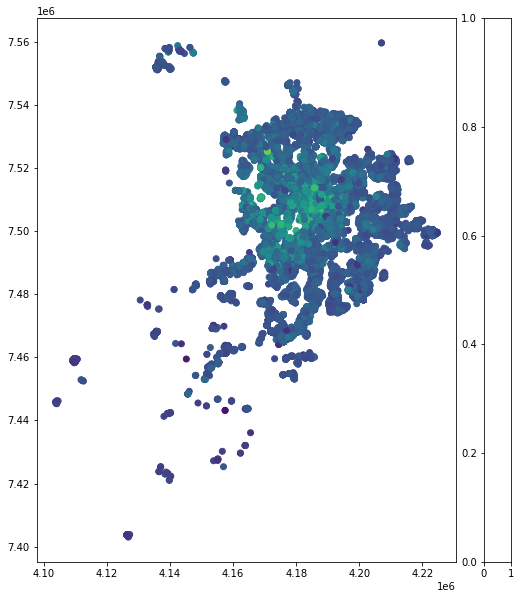

In [3]:
gdf = geopandas.GeoDataFrame(apt_train.join(bui_train, on="building_id"))
gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(10,10), legend=True, column="price", norm=matplotlib.colors.LogNorm(vmin=apt_train.price.min(), vmax=apt_train.price.max()))
#contextily.add_basemap(ax)

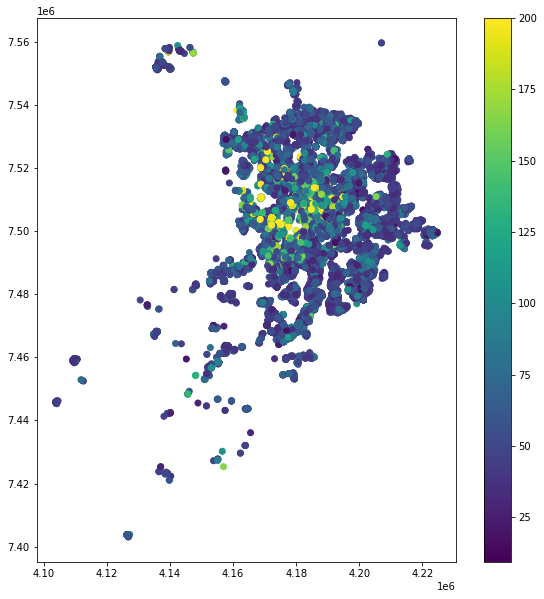

In [4]:
ax = gdf.plot(figsize=(10,10), legend=True, column="area_total", vmax=200)

In [5]:
# Read training buildings data and convert to a GeoDataFrame (we assume the projection to be WGS-84 a.k.a. EPSG:4326, this should probably be verified with the lecturer)
#bt_df = pd.read_csv("buildings_train.csv")
#bt_gdf = geopandas.GeoDataFrame(bt_df, geometry=geopandas.points_from_xy(bt_df.longitude, bt_df.latitude), crs="EPSG:4326")

# Convert to Web Mercator (EPSG:3857)
#bt_gdf_wm = bt_gdf.to_crs(epsg=3857)
#ax = bt_gdf_wm.plot(figsize=(20,20), alpha=0.5, column="constructed", edgecolor="k", legend=True)
#contextily.add_basemap(ax)

In [6]:
gdf = geopandas.GeoDataFrame(apt_test.join(bui_test, on="building_id"))
gdf.latitude.min(), gdf.latitude.max()
# Moscow ≈ 36-38, 55-57

(17.141734, 56.001625)

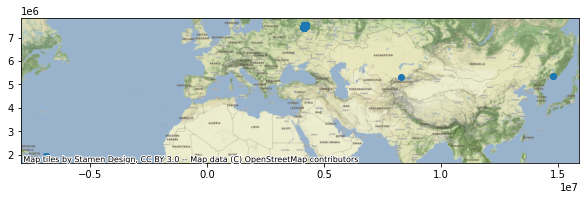

In [7]:
# Plot apartments in the testing set
gdf = geopandas.GeoDataFrame(apt_test.join(bui_test, on="building_id"))
gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(10,10))
contextily.add_basemap(ax)